# Section V: Modeling

In [1]:
#Import libraries
from sklearn import preprocessing
%matplotlib inline
import pandas as pd
import numpy as np
from datetime import datetime
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import operator


# seaborn graphing parameters
import seaborn as sns
sns.set_style("whitegrid")
sns.set_palette("BuGn_r")
sns.set(font_scale=1.4) 

# ml models and evaluation
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import f1_score
from sklearn.utils import resample
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Tuning the model
from sklearn.metrics import roc_curve, auc
from matplotlib.legend_handler import HandlerLine2D

pd.options.display.max_rows = 30
pd.options.display.max_columns = 30

#import .pkl files and variables from other notebooks
dockless = pd.read_pickle('./dockless_feature_engineering.pkl')
bcycle = pd.read_pickle('./bcycle_feature_engineering.pkl')
normal_dockless_rides = dockless.loc[(dockless['trip_distance'] > 1)
                                     & (dockless['trip_distance'] <= 16000)]


# Table of Contents

## 1. Predicting the Trip Distance of any given BCycle ride 
## 2. Predicting the Return Kiosk of any given BCycle ride using multinomial classification
## 3. Predicting "false starts" in Dockless rides

-----
-----
-----

# Model #1: Trip Distance with Regression

In [2]:
# In Section 2, real rides were ascertained to be 
# between 3 and 1050 minutes (17.5 hours)
normal_bcycle_rides = bcycle.loc[(bcycle['trip_duration_minutes'] >= 3)
                                    & (bcycle['trip_duration_minutes'] <= 400)]

In [3]:
bcycle_10k = normal_bcycle_rides.sample(10000, random_state=10)

# drop the extra columns
Xreg = bcycle_10k[['unix_checkout_time', 'device_trip_count',
              'odometer', 'month', 'day_of_week', 'hour',
                'year', 'trip_type']]

# create a value for the various membership types so it can pass and get insight
Xreg = pd.get_dummies(Xreg, columns=['month', 'day_of_week',
                                     'year', 'hour', 'trip_type'])

# get dummies left out: 'checkout_kiosk_id', 'return_kiosk_id'
# predicting for trip type 
yreg = bcycle_10k['trip_duration_minutes']

# test train split function
Xreg_train, Xreg_test, yreg_train, yreg_test = train_test_split(Xreg, yreg, test_size=0.25)

In [4]:
# Instantiate our model.
regr = LinearRegression()

# Fit our model to our data.
regr.fit(Xreg, yreg)
y_predict = regr.predict(Xreg)

# Display the attributes calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [ 2.47933920e-07 -1.40839532e-02  2.70124596e-06  1.00926368e+00
  3.00745650e+00  1.69203159e+00  2.69922153e+00  2.63421855e+00
  2.30620381e+00  2.57284210e+00 -2.23156863e+00 -3.08642491e+00
 -5.14336271e+00 -1.29921292e+00 -4.16066859e+00  5.04831948e+00
 -1.00422648e+00 -3.96140710e+00 -4.00272524e+00 -3.44098492e+00
  1.10232316e-02  7.35000103e+00  2.48418371e+01  1.66003382e+01
  6.29618559e+00  9.91736311e-01 -4.36906260e+00 -2.00446288e+01
 -2.43164057e+01 -6.74189751e+00 -5.17474685e+00  1.01187258e+00
  9.82651464e+00 -3.44577505e+00 -5.41982297e+00  4.10120284e+00
 -5.62536884e+00 -4.66219261e+00 -2.27767430e+00  5.09888972e+00
  7.48515908e+00  5.04156116e+00  3.65918252e+00  5.01449536e+00
  2.74343139e+00  3.23561864e-01 -4.32070023e-01 -1.23299801e+00
  2.46932224e+00 -3.49732075e+00 -3.09518110e+00 -2.87186856e+00
 -2.29827681e+00  0.00000000e+00]
Intercept: 
 -340.6922007604805


CPU times: user 936 ms, sys: 47.8 ms, total: 984 ms
Wall time: 955 ms


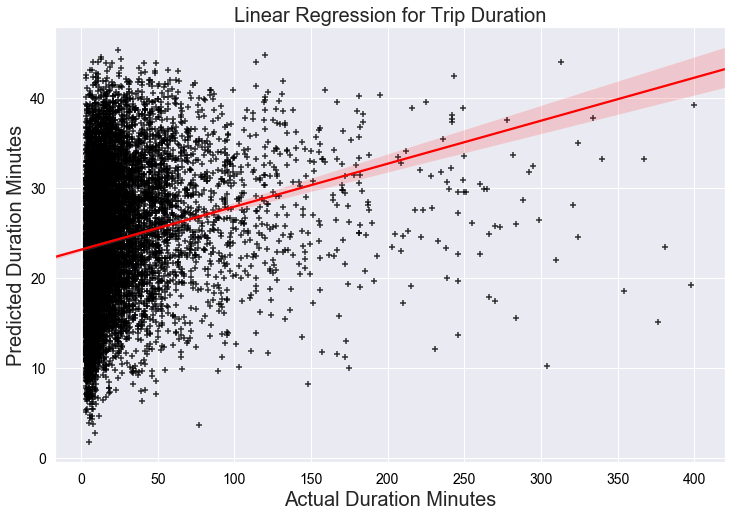

In [5]:
%%time 
ax = sns.regplot(yreg, y_predict, data=bcycle_10k, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, 
            lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, 
            dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='+',
            scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=None)
ax.set_title('Linear Regression for Trip Duration', fontsize=20)
ax.set_ylabel('Predicted Duration Minutes', fontsize=20 )
ax.set_xlabel('Actual Duration Minutes', fontsize=20 )
ax.figure.set_size_inches(12,8)
ax.tick_params(labelsize=14,labelcolor="black")

## Take the log of the independent variable 

/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/seaborn/regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


CPU times: user 1.01 s, sys: 25.7 ms, total: 1.03 s
Wall time: 952 ms


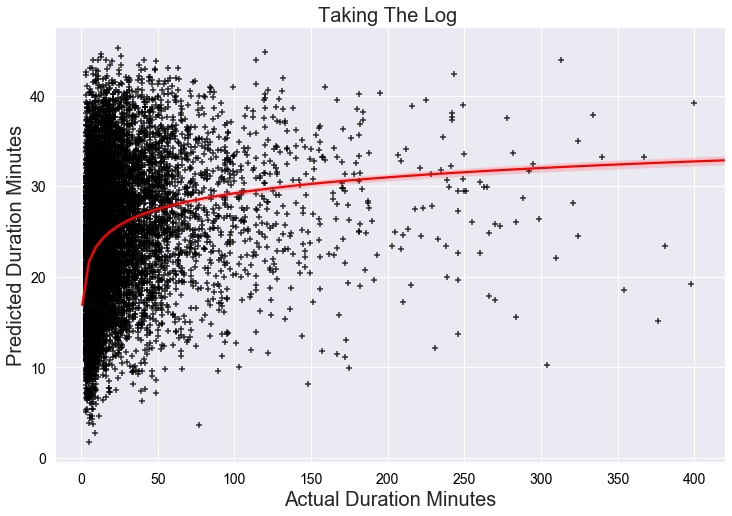

In [6]:
%%time
ax = sns.regplot(yreg, y_predict, data=bcycle_10k, x_estimator=None, x_bins=None, x_ci='ci', 
            scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, 
            lowess=False, robust=False, logx=True, x_partial=None, y_partial=None, truncate=False, 
            dropna=True, x_jitter=None, y_jitter=None, label=None, color=None, marker='+',
            scatter_kws={"color": "black"}, line_kws={"color": "red"}, ax=None)
ax.set_title('Taking The Log ',fontsize=20 )
ax.set_ylabel('Predicted Duration Minutes', fontsize=20 )
ax.set_xlabel('Actual Duration Minutes',fontsize=20 )
ax.figure.set_size_inches(12,8)
ax.tick_params(labelsize=14,labelcolor="black")

# Model #2: Kiosks & Multinomial Classification

## There are 96 kiosks available to predict where they will be returned

In [7]:
# create new variables 
kiosk_length_r = pd.value_counts(bcycle['return_kiosk_id'].values,
                                 sort=False)
kiosk_length_c = pd.value_counts(bcycle['checkout_kiosk_id'].values,
                                 sort=False)
# show number of kiosk
print("number of return kiosks: " + str(len(kiosk_length_r)))
print("number of checkout kiosks: " + str(len(kiosk_length_c)))

number of return kiosks: 96
number of checkout kiosks: 96


In [8]:
# drop the extra columns
X96 = bcycle[['checkout_kiosk_id', 'odometer', 'unix_checkout_time',
              'device_trip_count', 'year']]

# create a value for the various membership types so it can pass and get insight
X96 = pd.get_dummies(X96, columns=['checkout_kiosk_id', 'year'])

# predicting for trip type 
y96 = bcycle['return_kiosk_id']

# test train split function
X96_train, X96_test, y96_train, y96_test = train_test_split(X96, y96, test_size=0.25)

In [9]:
# Fit regression model (using the natural log of one of the regressors)
kiosk_results = smf.ols('return_kiosk_id ~ checkout_kiosk_id +'
                        'unix_checkout_time + device_trip_count + odometer',
                  data=bcycle).fit()

# Inspect the results
print(kiosk_results.summary())

                            OLS Regression Results                            
Dep. Variable:        return_kiosk_id   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.423
Method:                 Least Squares   F-statistic:                 2.057e+05
Date:                Tue, 08 Oct 2019   Prob (F-statistic):               0.00
Time:                        15:12:45   Log-Likelihood:            -8.4152e+06
No. Observations:             1122091   AIC:                         1.683e+07
Df Residuals:                 1122086   BIC:                         1.683e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3820.7737     15

In [10]:
print(scipy.stats.pearsonr(bcycle['checkout_kiosk_id'], bcycle['return_kiosk_id']))
print(scipy.stats.pearsonr(bcycle['unix_checkout_time'], bcycle['return_kiosk_id']))
print(scipy.stats.pearsonr(bcycle['device_trip_count'], bcycle['return_kiosk_id']))
print(scipy.stats.pearsonr(bcycle['odometer'], bcycle['return_kiosk_id']))

(0.5831835311195691, 0.0)
(0.5566707635876242, 0.0)
(0.3030810538454552, 0.0)
(0.273070043538321, 0.0)


## Naive Bayes Multinomial Classification

In [11]:
%%time
# Naive Bayes Classifier 
gnb = GaussianNB() # Specify constructor parameter
cv_gnb = cross_val_score(gnb, X96_train, y96_train, cv=5)
print("Cross Validation Scorres: ", cv_gnb)
print("Cross Validation Mean: ", cv_gnb.mean())
print("Cross Validation Score Variance: ", cv_gnb.var())

Cross Validation Scorres:  [0.09114885 0.09102682 0.09138114 0.09104197 0.09197178]
Cross Validation Mean:  0.09131411441906197
Cross Validation Score Variance:  1.2418629973600328e-07
CPU times: user 1min 16s, sys: 50.2 s, total: 2min 6s
Wall time: 2min 7s


In [12]:
%%time
seed = 7
test_size = 0.25
X96_train, X96_test, y96_train, y96_test = train_test_split(X96, y96, test_size=test_size,
    random_state=seed)

# fit model on training data
gnb.fit(X96_train, y96_train)

# Classify, storing the result in a new variable.
y_pred_gnb = gnb.predict(X96_test)

# make predictions for test data
predictions_gnb = gnb.predict(X96_test)

# evaluate predictions
accuracy_gnb = accuracy_score(y96_test, predictions_gnb)
print("Accuracy: %.2f%%" % (accuracy_gnb * 100.0))

Accuracy: 9.13%
CPU times: user 47.6 s, sys: 31.7 s, total: 1min 19s
Wall time: 1min 19s


In [13]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X96.shape,
    (y96_test != y_pred_gnb).sum()
))

print('\nR-squared:')
print(gnb.score(X96_test, y96_test))

Number of mislabeled points out of a total (1122091, 106) points : 254914

R-squared:
0.09129019723872908


In [14]:
results_gnb = confusion_matrix(y96_test, y_pred_gnb) 
print('\nConfusion Matrix :')
print(results_gnb) 
print('Accuracy Score :',accuracy_score(y96_test, y_pred_gnb))
print('\nReport : ')
print(classification_report(y96_test, y_pred_gnb))


Confusion Matrix :
[[  0   0   0 ...   0   0   0]
 [  0 188   0 ...   0   0   0]
 [  0 104   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
Accuracy Score : 0.09129019723872908

Report : 


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        1001       0.00      0.00      0.00         2
        1002       0.02      0.75      0.04       251
        1003       0.00      0.00      0.00       152
        1005       0.00      0.00      0.00        71
        1006       0.00      0.00      0.00       389
        1007       0.00      0.00      0.00      1195
        1008       0.00      0.00      0.00      1038
        2494       0.10      0.01      0.01      9411
        2495       0.00      0.00      0.00      8703
        2496       0.00      0.00      0.00      4110
        2497       0.00      0.00      0.00      5778
        2498       0.00      0.00      0.00      8382
        2499       0.05      0.52      0.10     10259
        2500       0.00      0.00      0.00       104
        2501       0.00      0.00      0.00      7941
        2502       0.00      0.00      0.00      4865
        2503       0.00      0.00      0.00      4698
        2504       0.00    

## Random Forest Multinomial Classification

In [15]:
%%time
# instantiate RF classifier with hyperparameters
rfc = ensemble.RandomForestClassifier(n_estimators=100, criterion="gini",
                                      max_depth=10, min_samples_split=2, 
                                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                      max_features="auto", max_leaf_nodes=None,
                                      min_impurity_decrease=0.0, min_impurity_split=None,
                                      bootstrap=True, oob_score=False, n_jobs=-1, 
                                      random_state=None, verbose=0, warm_start=False)
# {0:1,1:2}
# cross validation on RFC
cv_rfc = cross_val_score(rfc, X96_train, y96_train, cv=5)
print("Cross Validation Scores: ", cv_rfc)
print("Cross Validation Mean: ", cv_rfc.mean())
print("Cross Validation Score Varaince: ", cv_rfc.var())

Cross Validation Scores:  [0.14918653 0.14940446 0.15072424 0.14999614 0.15053335]
Cross Validation Mean:  0.14996894488105983
Cross Validation Score Varaince:  3.6411658062449573e-07
CPU times: user 1min 43s, sys: 15.1 s, total: 1min 58s
Wall time: 5min 52s


In [16]:
%%time
seed = 7
test_size = 0.25
X96_train, X96_test, y96_train, y96_test = train_test_split(X96, y96, test_size=test_size,
    random_state=seed)

# fit model on training data
rfc.fit(X96_train, y96_train)

# store the result in a new variable.
y_pred_rfc = rfc.predict(X96_test)

# make predictions for test data
predictions_rfc = rfc.predict(X96_test)

# evaluate predictions
accuracy_rfc = accuracy_score(y96_test, predictions_rfc)
print("Accuracy: %.2f%%" % (accuracy_rfc * 100.0))

Accuracy: 15.01%
CPU times: user 5min 34s, sys: 31.2 s, total: 6min 6s
Wall time: 1min 42s


In [17]:
# Display results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X96.shape[0],
    (y96_test != y_pred_rfc).sum()
))

print('\nR-squared:')
print(rfc.score(X96_test, y96_test))

Number of mislabeled points out of a total 1122091 points : 238430

R-squared:
0.15005186740481172


In [18]:
# RFC confusion matrix
results_rfc = confusion_matrix(y96_test, y_pred_rfc) 
print('\nConfusion Matrix :')
print(results_rfc) 
print('Accuracy Score :',accuracy_score(y96_test, y_pred_rfc))
print('\nReport : ')
print(classification_report(y96_test, y_pred_rfc))


Confusion Matrix :
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   1   0]
 [  0   0   0 ...   0 146   0]
 [  0   0   0 ...   0  15   0]]
Accuracy Score : 0.15005186740481172

Report : 


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

        1001       0.00      0.00      0.00         2
        1002       0.00      0.00      0.00       251
        1003       0.00      0.00      0.00       152
        1005       0.00      0.00      0.00        71
        1006       0.00      0.00      0.00       389
        1007       0.00      0.00      0.00      1195
        1008       0.00      0.00      0.00      1038
        2494       0.11      0.26      0.15      9411
        2495       0.10      0.07      0.08      8703
        2496       0.00      0.00      0.00      4110
        2497       0.19      0.17      0.18      5778
        2498       0.15      0.08      0.11      8382
        2499       0.06      0.52      0.11     10259
        2500       0.00      0.00      0.00       104
        2501       0.18      0.02      0.04      7941
        2502       0.20      0.14      0.16      4865
        2503       0.00      0.00      0.00      4698
        2504       0.00    

# Model #3: Predicting "false starts"

# Down sample majority class

In [19]:
# creating dataframe of rides from 0 to 16000 meters
false_start_rides = dockless.loc[(dockless['trip_distance'] <= 16000)]
len(normal_dockless_rides)

4962658

In [20]:
# Separate majority and minority classes
df_majority = false_start_rides[false_start_rides.trip_type==0]
df_minority = false_start_rides[false_start_rides.trip_type==1]

In [21]:
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False, # sample without replacement
                                 n_samples=464633, # to match minority class
                                 random_state=123) # reproducible results

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.trip_type.value_counts()

1    464633
0    464633
Name: trip_type, dtype: int64

In [22]:
# Separate input features (X) and target variable (y)
ydown = df_downsampled['trip_type']
Xdown = df_downsampled[['unix_start_time', 'unix_end_time', 'vehicle_type',
                       'month', 'hour', 'day_of_week', 'odometer',
                        'device_id_trip_count']]
Xdown = pd.get_dummies(Xdown, columns=['vehicle_type', 'month', 'hour',
                                       'day_of_week'])
 
# test train split function
Xdown_train, Xdown_test, ydown_train, ydown_test = train_test_split(Xdown, ydown, test_size=0.25)

## Logistic Regression

In [23]:
%%time
# instantiate logistic regression 
lr = LogisticRegression(penalty="l1", dual=False, tol=0.0001, C=1.0,
                        fit_intercept=True, intercept_scaling=1,
                        class_weight=None, random_state=42, solver="saga", 
                        max_iter=150, multi_class="ovr", verbose=1,
                        warm_start=False, n_jobs=None)

# cross validate
cv_lr = cross_val_score(lr, Xdown_train, ydown_train, cv=5)
print(cv_lr)
print("Cross Validation Mean: ", cv_lr.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 86 seconds


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 86 seconds


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 86 seconds


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 88 seconds


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 86 seconds
[0.50241407 0.50246072 0.5020231  0.50295934 0.50221323]
Cross Validation Mean:  0.5024140939213745
CPU times: user 7min 12s, sys: 2.2 s, total: 7min 14s
Wall time: 7min 16s


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.4min finished


In [24]:
%%time
seed = 7
test_size = 0.25

# fit model on training data
lr.fit(Xdown_train, ydown_train)

# make predictions for test data
predictions = lr.predict(Xdown_test)

# evaluate predictions
accuracy_lr = accuracy_score(ydown_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_lr * 100.0))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 109 seconds
Accuracy: 50.10%
CPU times: user 1min 48s, sys: 512 ms, total: 1min 49s
Wall time: 1min 49s


/Users/jakegrosek/miniconda3/envs/minimal_ds/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.8min finished


In [25]:
%%time
# Classify, storing the result in a new variable.
y_pred_lr = lr.predict(Xdown_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    Xdown.shape[0],
    (ydown_test != y_pred_lr).sum()
))

Number of mislabeled points out of a total 929266 points : 115919
CPU times: user 75.9 ms, sys: 21.8 ms, total: 97.7 ms
Wall time: 66.2 ms


In [26]:
# Logistic regression confusion matrix
results_lr = confusion_matrix(ydown_test, y_pred_lr) 
print('\nConfusion Matrix :')
print(results_lr) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_lr))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_lr))

print('\nR-squared:')
print(lr.score(Xdown_test, ydown_test))


Confusion Matrix :
[[115029    876]
 [115043   1369]]
Accuracy Score : 0.5010309189598695

Report : 
              precision    recall  f1-score   support

           0       0.50      0.99      0.66    115905
           1       0.61      0.01      0.02    116412

    accuracy                           0.50    232317
   macro avg       0.55      0.50      0.34    232317
weighted avg       0.56      0.50      0.34    232317


R-squared:
0.5010309189598695


## Naive Bayes

In [27]:
%%time
# Naive Bayes Classifier 
gnb_fs = GaussianNB()

#cross validate
cv_gnb_fs = cross_val_score(gnb_fs, Xdown_train, ydown_train, cv=5)
print("Cross Validation Scorres: ", cv_gnb_fs)
print("Cross Validation Mean: ", cv_gnb_fs.mean())
print("Cross Validation Score Variance: ", cv_gnb_fs.var())

Cross Validation Scorres:  [0.49942966 0.49931128 0.49950499 0.50015424 0.49848984]
Cross Validation Mean:  0.4993780030338195
Cross Validation Score Variance:  2.8292661689722215e-07
CPU times: user 4.02 s, sys: 1.89 s, total: 5.91 s
Wall time: 5.99 s


In [28]:
%%time
seed = 7
test_size = 0.25

# fit model on training data
gnb_fs.fit(Xdown_train, ydown_train)

# Classify, storing the result in a new variable.
y_pred_gnb_fs = gnb_fs.predict(Xdown_test)

# make predictions for test data
predictions_gnb_fs = gnb_fs.predict(Xdown_test)

# evaluate predictions
accuracy_gnb_fs = accuracy_score(ydown_test, predictions_gnb_fs)
print("Accuracy: %.2f%%" % (accuracy_gnb_fs * 100.0))

Accuracy: 49.81%
CPU times: user 1.15 s, sys: 594 ms, total: 1.74 s
Wall time: 1.83 s


In [29]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    Xdown.shape,
    (ydown_test != y_pred_gnb_fs).sum()
))

print('\nR-squared:')
print(gnb_fs.score(Xdown_test, ydown_test))

Number of mislabeled points out of a total (929266, 49) points : 116596

R-squared:
0.49811679730712777


In [30]:
results_gnb_fs = confusion_matrix(ydown_test, y_pred_gnb_fs) 
print('\nConfusion Matrix :')
print(results_gnb_fs) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_gnb_fs))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_gnb_fs))


Confusion Matrix :
[[114498   1407]
 [115189   1223]]
Accuracy Score : 0.49811679730712777

Report : 
              precision    recall  f1-score   support

           0       0.50      0.99      0.66    115905
           1       0.47      0.01      0.02    116412

    accuracy                           0.50    232317
   macro avg       0.48      0.50      0.34    232317
weighted avg       0.48      0.50      0.34    232317



## Random Forest Classifier

In [31]:
%%time
# RFC with hyperparameters
rfc_fs = ensemble.RandomForestClassifier(n_estimators=100, max_depth=None, 
                                         min_samples_split=2, min_samples_leaf=1,
                                         min_weight_fraction_leaf=0.0, 
                                         max_features="auto", max_leaf_nodes=None,
                                         min_impurity_decrease=0.0, 
                                         min_impurity_split=None, bootstrap=True, 
                                         oob_score=False, n_jobs=-1, 
                                         random_state=42, verbose=0, warm_start=False,
                                         class_weight="balanced")

# cross validation
cv_rfc_fs = cross_val_score(rfc_fs, Xdown_train, ydown_train, cv=5)
print("Cross Validation Scores: ", cv_rfc_fs)
print("Cross Validation Mean: ", cv_rfc_fs.mean())
print("Cross Validation Score Varaince: ", cv_rfc_fs.var())

Cross Validation Scores:  [0.67306354 0.67192051 0.67232944 0.67168858 0.67145901]
Cross Validation Mean:  0.6720922162049694
Cross Validation Score Varaince:  3.186191401807978e-07
CPU times: user 1min 33s, sys: 59.5 s, total: 2min 32s
Wall time: 9min 49s


In [32]:
%%time
seed = 7
test_size = 0.25

# fit model on training data
rfc_fs.fit(Xdown_train, ydown_train)

# Classify, storing the result in a new variable.
y_pred_rfc_fs = rfc_fs.predict(Xdown_test)

# make predictions for test data
predictions_rfc_fs = rfc_fs.predict(Xdown_test)

# evaluate predictions
accuracy_rfc_fs = accuracy_score(ydown_test, predictions_rfc_fs)
print("Accuracy: %.2f%%" % (accuracy_rfc_fs * 100.0))

Accuracy: 67.46%
CPU times: user 9min 7s, sys: 11.5 s, total: 9min 18s
Wall time: 2min 33s


In [33]:
# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    Xdown.shape[0],
    (ydown_test != y_pred_rfc_fs).sum()
))

print('\nR-squared:')
print(rfc_fs.score(Xdown_test, ydown_test))

Number of mislabeled points out of a total 929266 points : 75593

R-squared:
0.674612705914763


In [34]:
# RFC confusion matrix
results_rfc_fs = confusion_matrix(ydown_test, y_pred_rfc_fs) 
print('\nConfusion Matrix :')
print(results_rfc_fs) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_rfc_fs))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_rfc_fs))


Confusion Matrix :
[[78984 36921]
 [38672 77740]]
Accuracy Score : 0.674612705914763

Report : 
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    115905
           1       0.68      0.67      0.67    116412

    accuracy                           0.67    232317
   macro avg       0.67      0.67      0.67    232317
weighted avg       0.67      0.67      0.67    232317



## XGBoost

In [35]:
%%time
# instantiate XGBoost
xgb = XGBClassifier()

# cross validation
cv_xgb = cross_val_score(xgb, Xdown_train, ydown_train, cv=5)
print(cv_xgb)
print("Cross Validation Mean: ", cv_xgb.mean())

[0.67771233 0.67519191 0.67529952 0.67475913 0.67601461]
Cross Validation Mean:  0.6757954990478507
CPU times: user 12min 40s, sys: 5.31 s, total: 12min 45s
Wall time: 12min 50s


In [36]:
%%time
seed = 7
test_size = 0.25
    
# fit model on training data
xgb.fit(Xdown_train, ydown_train)

# make predictions for test data
predictions = xgb.predict(Xdown_test)

# evaluate predictions
accuracy_xgb = accuracy_score(ydown_test, predictions)
print("Accuracy: %.2f%%" % (accuracy_xgb * 100.0))

Accuracy: 67.51%
CPU times: user 3min 13s, sys: 1.1 s, total: 3min 14s
Wall time: 3min 15s


In [37]:
# Classify, storing the result in a new variable.
y_pred_xgb = xgb.predict(Xdown_test)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    Xdown.shape[0],
    (ydown_test != y_pred_xgb).sum()
))

Number of mislabeled points out of a total 929266 points : 75473


In [38]:
# XGB confusion matrix
results_xgb = confusion_matrix(ydown_test, y_pred_xgb) 
print('\nConfusion Matrix :')
print(results_xgb) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_xgb))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_xgb))

print('\nR-squared:')
print(xgb.score(Xdown_test, ydown_test))


Confusion Matrix :
[[87062 28843]
 [46630 69782]]
Accuracy Score : 0.6751292415105222

Report : 
              precision    recall  f1-score   support

           0       0.65      0.75      0.70    115905
           1       0.71      0.60      0.65    116412

    accuracy                           0.68    232317
   macro avg       0.68      0.68      0.67    232317
weighted avg       0.68      0.68      0.67    232317


R-squared:
0.6751292415105222


## Results:
## XGBoost and RFC were the best of the four models. While they both had almost identical Accuracy scores, RFC had a much better confusion matrix with more True Positives and fewer False Positives.

# Tuning RandomForest Classifier for optimal results

## Tune for n-estimators

In [39]:
%%time
y_pred = rfc_fs.predict(Xdown_test) 
false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

CPU times: user 23 s, sys: 5.99 s, total: 29 s
Wall time: 8.9 s


0.6746276049817235

NameError: name 'line1' is not defined

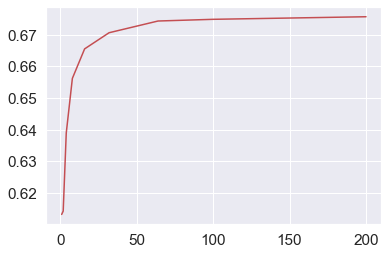

In [40]:
%%time
# create a list of possible estimators
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]

# create new lists for train and test results
train_results = []
test_results = []
# for loop looping over n_estimators
for estimator in n_estimators:
    rfc_fs = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rfc_fs.fit(Xdown_train, ydown_train)   
    
    train_pred = rfc_fs.predict(Xdown_train)
      
    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = rfc_fs.predict(Xdown_test)  

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(n_estimators, train_results, color='b', label= "Train AUC")
line2, = plt.plot(n_estimators, test_results, color='r', label= "Test AUC")

plt.legend(handler_map={(line1): HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

## After 37 estimators, it doesn't seem to be doing any extra good and is more likely to overfit.

## Tune for max_depth

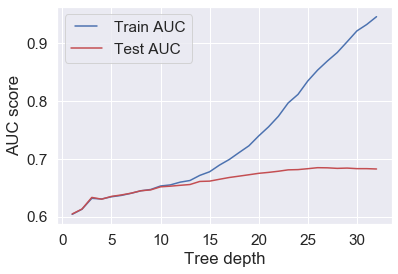

CPU times: user 1h 3min 32s, sys: 39.9 s, total: 1h 4min 12s
Wall time: 18min 4s


In [41]:
%%time

max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results = []

for max_depth in max_depths:
    rfc_fs = RandomForestClassifier(n_estimators=37, max_depth=max_depth, n_jobs=-1)
    rfc_fs.fit(Xdown_train, ydown_train)   

    train_pred = rfc_fs.predict(Xdown_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rfc_fs.predict(Xdown_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, color='b', label= "Train AUC")
line2, = plt.plot(max_depths, test_results, color='r', label= "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

## The model overall tends to not learn anything new with greater tree depth, so I'll use 15.

## Tune for min_samples_split

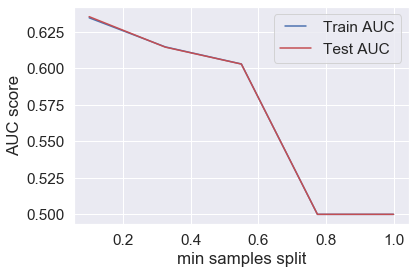

CPU times: user 1min 18s, sys: 2.88 s, total: 1min 21s
Wall time: 1min 22s


In [42]:
%%time

min_samples_splits = np.linspace(0.1, 1.0, 5, 10)

train_results = []
test_results = []

for min_samples_split in min_samples_splits:
    rfc_fs = RandomForestClassifier(n_estimators=37, min_samples_split=min_samples_split)
    rfc_fs.fit(Xdown_train, ydown_train)   

    train_pred = rfc_fs.predict(Xdown_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rfc_fs.predict(Xdown_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_splits, train_results, color='b', label= "Train AUC")
line2, = plt.plot(min_samples_splits, test_results, color='r', label= "Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples split')
plt.show()

## As the model learns more, it is underfitting. We will use 0.1 for min_sample_split.

## Tune for min_samples_leaf

link to tuning documentation: https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d

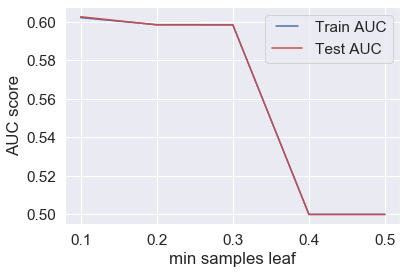

CPU times: user 36.6 s, sys: 2.69 s, total: 39.3 s
Wall time: 39.6 s


In [43]:
%%time

min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)

train_results = []
test_results = []

for min_samples_leaf in min_samples_leafs:
    rfc_fs = RandomForestClassifier(n_estimators=37, min_samples_leaf=min_samples_leaf)
    rfc_fs.fit(Xdown_train, ydown_train)
    
    train_pred = rfc_fs.predict(Xdown_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rfc_fs.predict(Xdown_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, color='b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, color='r', label="Test AUC")

plt.legend(handler_map={(line1): HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

## We have another underfitting case here as it learns more, so we will use 0.29 for min_sample_leaf.

## Tune for max_features

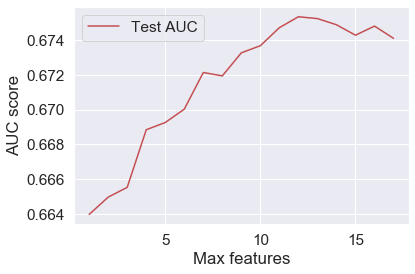

CPU times: user 41min 42s, sys: 29.6 s, total: 42min 12s
Wall time: 42min 24s


In [44]:
%%time

max_features = list(range(1,df_downsampled.shape[1]))

train_results = []
test_results = []

for max_feature in max_features:
    rfc_fs = RandomForestClassifier(n_estimators=37, max_features=max_feature)
    rfc_fs.fit(Xdown_train, ydown_train)
    
    train_pred = rfc_fs.predict(Xdown_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    y_pred = rfc_fs.predict(Xdown_test)   

    false_positive_rate, true_positive_rate, thresholds = roc_curve(ydown_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

from matplotlib.legend_handler import HandlerLine2D
#line1, = plt.plot(max_features, train_results, color='b', label="Train AUC")
line2, = plt.plot(max_features, test_results, color='r', label="Test AUC")

plt.legend(handler_map={(line1): HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Max features')
plt.show()

## There doesn't seem to be better performance after 12  features.

# Tuning Summary:
## 1. n_estimators - 37
## 2. max_depth - 15
## 3. min_sample_split - 0.1
## 4. min_samples_leaf - 0.26
## 5. max_features - 12

# Final Model Run

In [45]:
%%time

rfc_fs_tuned = ensemble.RandomForestClassifier(n_estimators=37, max_depth=15, min_samples_split=0.1,
                                         min_samples_leaf=0.26, min_weight_fraction_leaf=0.0,
                                         max_features=12, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                         min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=-1, 
                                         random_state=42, verbose=0, warm_start=False, class_weight="balanced")
cv_rfc_fs_tuned = cross_val_score(rfc_fs_tuned, Xdown_train, ydown_train, cv=5)
print("Cross Validation Scores: ", cv_rfc_fs_tuned)
print("Cross Validation Mean: ", cv_rfc_fs_tuned.mean())
print("Cross Validation Score Variance: ", cv_rfc_fs_tuned.var())

Cross Validation Scores:  [0.60122963 0.5995552  0.59817777 0.5985336  0.59769422]
Cross Validation Mean:  0.5990380873781308
Cross Validation Score Variance:  1.5741815211391394e-06
CPU times: user 4.7 s, sys: 1.74 s, total: 6.44 s
Wall time: 25.9 s


In [50]:
%%time

seed = 7
test_size = 0.25

# fit model on training data
rfc_fs_tuned.fit(Xdown_train, ydown_train)

# Classify, storing the result in a new variable.
y_pred_rfc_fs_tuned = rfc_fs_tuned.predict(Xdown_test)

# make predictions for test data
predictions_rfc_fs_tuned = rfc_fs_tuned.predict(Xdown_test)

# evaluate predictions
accuracy_rfc_fs_tuned = accuracy_score(ydown_test, predictions_rfc_fs_tuned)
print("Accuracy: %.2f%%" % (accuracy_rfc_fs_tuned * 100.0))

Accuracy: 59.86%
CPU times: user 14.6 s, sys: 863 ms, total: 15.5 s
Wall time: 5.22 s


In [51]:
%%time

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    Xdown.shape[0],
    (ydown_test != y_pred_rfc_fs_tuned).sum()
))

print('\nR-squared:')
print(rfc_fs_tuned.score(Xdown_test, ydown_test))

Number of mislabeled points out of a total 929266 points : 93259

R-squared:
0.5985700572924065
CPU times: user 650 ms, sys: 89.9 ms, total: 740 ms
Wall time: 365 ms


## Even after tuning, model performance worsened by ~10%. 

In [54]:
# Tuned RFC confusion matrix
results_rfc_fs_tuned = confusion_matrix(ydown_test, y_pred_rfc_fs_tuned) 
print('\nConfusion Matrix :')
print(results_rfc_fs_tuned) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_rfc_fs_tuned))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_rfc_fs_tuned))


Confusion Matrix :
[[67686 48219]
 [45040 71372]]
Accuracy Score : 0.5985700572924065

Report : 
              precision    recall  f1-score   support

           0       0.60      0.58      0.59    115905
           1       0.60      0.61      0.60    116412

    accuracy                           0.60    232317
   macro avg       0.60      0.60      0.60    232317
weighted avg       0.60      0.60      0.60    232317



In [53]:
# Original RFC confusion matrix
results_rfc_fs = confusion_matrix(ydown_test, y_pred_rfc_fs) 
print('\nConfusion Matrix :')
print(results_rfc_fs) 
print('Accuracy Score :',accuracy_score(ydown_test, y_pred_rfc_fs))
print('\nReport : ')
print(classification_report(ydown_test, y_pred_rfc_fs))


Confusion Matrix :
[[78734 37171]
 [38257 78155]]
Accuracy Score : 0.675322942358932

Report : 
              precision    recall  f1-score   support

           0       0.67      0.68      0.68    115905
           1       0.68      0.67      0.67    116412

    accuracy                           0.68    232317
   macro avg       0.68      0.68      0.68    232317
weighted avg       0.68      0.68      0.68    232317



# Conclusion

- Additional feature engineering may be more relevant to model performance than tuning parameters.
- Since the scooter arrived April 2018, the initial months of adoption may be skewing the data in ways not easily understood. It will be interesting how the model performs when all of 2019's ride data is in the model. This should reflect an experienced market's usage.